In [1]:
import cv2
import os
import numpy as np
import EpipolarGeometry as epigeo
from matplotlib import pyplot as plt

In [2]:
def convert(points):
    return epigeo.convert_coordinate(points, (5472, 7296))

In [3]:
left_img = cv2.imread(os.path.join(os.curdir, 'left_image.jpg'))
right_img = cv2.imread(os.path.join(os.curdir, 'right_image.jpg'))

In [4]:
def plt_corners(img, corners):
    font = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 15
    color = (0, 0, 255)
    thickness = 10
    for i in range(len(corners)):
        img = cv2.rectangle(img, (corners[i][0] - 30, corners[i][1] - 30), 
                                   (corners[i][0] + 30, corners[i][1] + 30), color, thickness)
        img = cv2.putText(img, str(i+1), (corners[i][0], corners[i][1]), font,  
                   fontScale, (255, 0, 0), thickness * 2, cv2.LINE_AA) 
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [5]:
left_img.shape

(5472, 7296, 3)

In [6]:
right_points = [
    (1279, 4828),
    (3130, 4645),
    (2190, 3457),
    (2675, 3684),
    (5127, 4162),
    (6571, 4001),
    (4708, 5290),
    (5206, 4884)
]
left_points = [
    (283, 4644),
    (2359, 4287),
    (998, 3067),
    (1874, 3301),
    (4195, 3677),
    (5449, 3497),
    (3795, 4764),
    (4251, 4343)
]

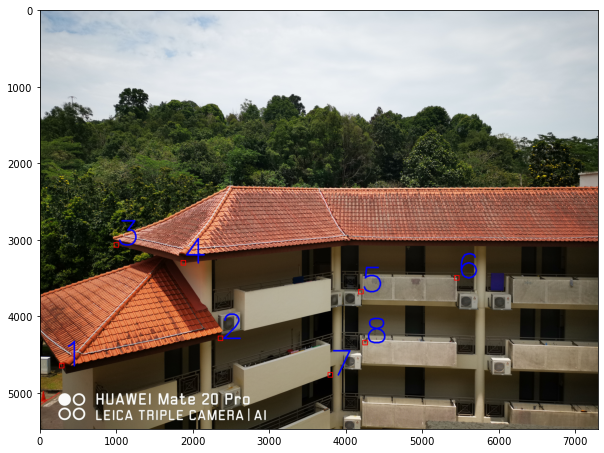

In [7]:
plt_corners(left_img.copy(), left_points)

In [8]:
plt_corners(right_img.copy(), right_points)

In [9]:
F = epigeo.get_FundamentalMatrix(convert(left_points), convert(right_points))

In [10]:
F

array([[-6.42491449e-08, -3.10211662e-06,  6.86054962e-04],
       [ 3.09914847e-06,  3.23107391e-07, -1.12109822e-03],
       [-1.85861829e-03, -1.00844191e-03,  1.00000000e+00]])

In [11]:
left_epi = [
        (3304, 4161),
        (3803, 3915),
        (4209, 5120)
]

In [12]:
w,b = [], []
for coor in left_epi:
    tmp = epigeo.get_epipolar_param(F, convert([coor]), 'left')
    w.append(tmp[0])
    b.append(tmp[1])
w, b

([-1.1869004325800114, -0.6253918573529671, -1.0762752210942848],
 [669.1655129451652, 461.181849737502, 604.7462453044731])

In [14]:
epigeo.plot_epipolar_line(w, b, 'right_image.jpg', 'right_img_epipolarline.jpg')

In [15]:
converted_left = convert(left_points)
converted_right = convert(right_points)

In [16]:
for i in range(8):
    print(np.matmul(np.matmul((converted_left[i][0], converted_left[i][1],1), F), 
                    np.asarray([converted_right[i][0], converted_right[i][1], 1]).T))

-9.992007221626409e-16
-4.440892098500626e-16
1.1102230246251565e-16
-4.163336342344337e-17
4.440892098500626e-16
1.3322676295501878e-15
1.3322676295501878e-15
4.440892098500626e-16
